# Phase 1 : 
## To check if user input image is a car or not. Tested against multiple cnn frameworks to find one with maximum accuracy.

### Data0 - dataset of all images of cars(damaged and undamaged ones)

In [1]:
import os
import urllib.request
import json
import numpy as np
import pickle as pk
from IPython.display import Image
from collections import Counter, defaultdict

In [2]:
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications.imagenet_utils import preprocess_input
from keras.utils import get_file 
from keras.preprocessing.image import img_to_array, load_img


In [3]:
CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'

In [4]:
vgg16 = VGG16(weights='imagenet')
vgg19 = VGG19(weights='imagenet')
resnet = ResNet50(weights='imagenet')
inception = InceptionV3(weights='imagenet')
xception = Xception(weights='imagenet')

In [5]:
def prepare_image_224(img_path):
    img = load_img(img_path, target_size=(224,224))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [6]:
def prepare_image_299(img_path):
    img = load_img(img_path, target_size=(299,299))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [7]:
def get_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects a batch of predictions (i.e. a 2D array of shape (samples, 1000)). Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',CLASS_INDEX_PATH,cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        result.sort(key=lambda x: x[2], reverse=True)
        results.append(result)
    return results

In [8]:
# Image('testimage.jpg')

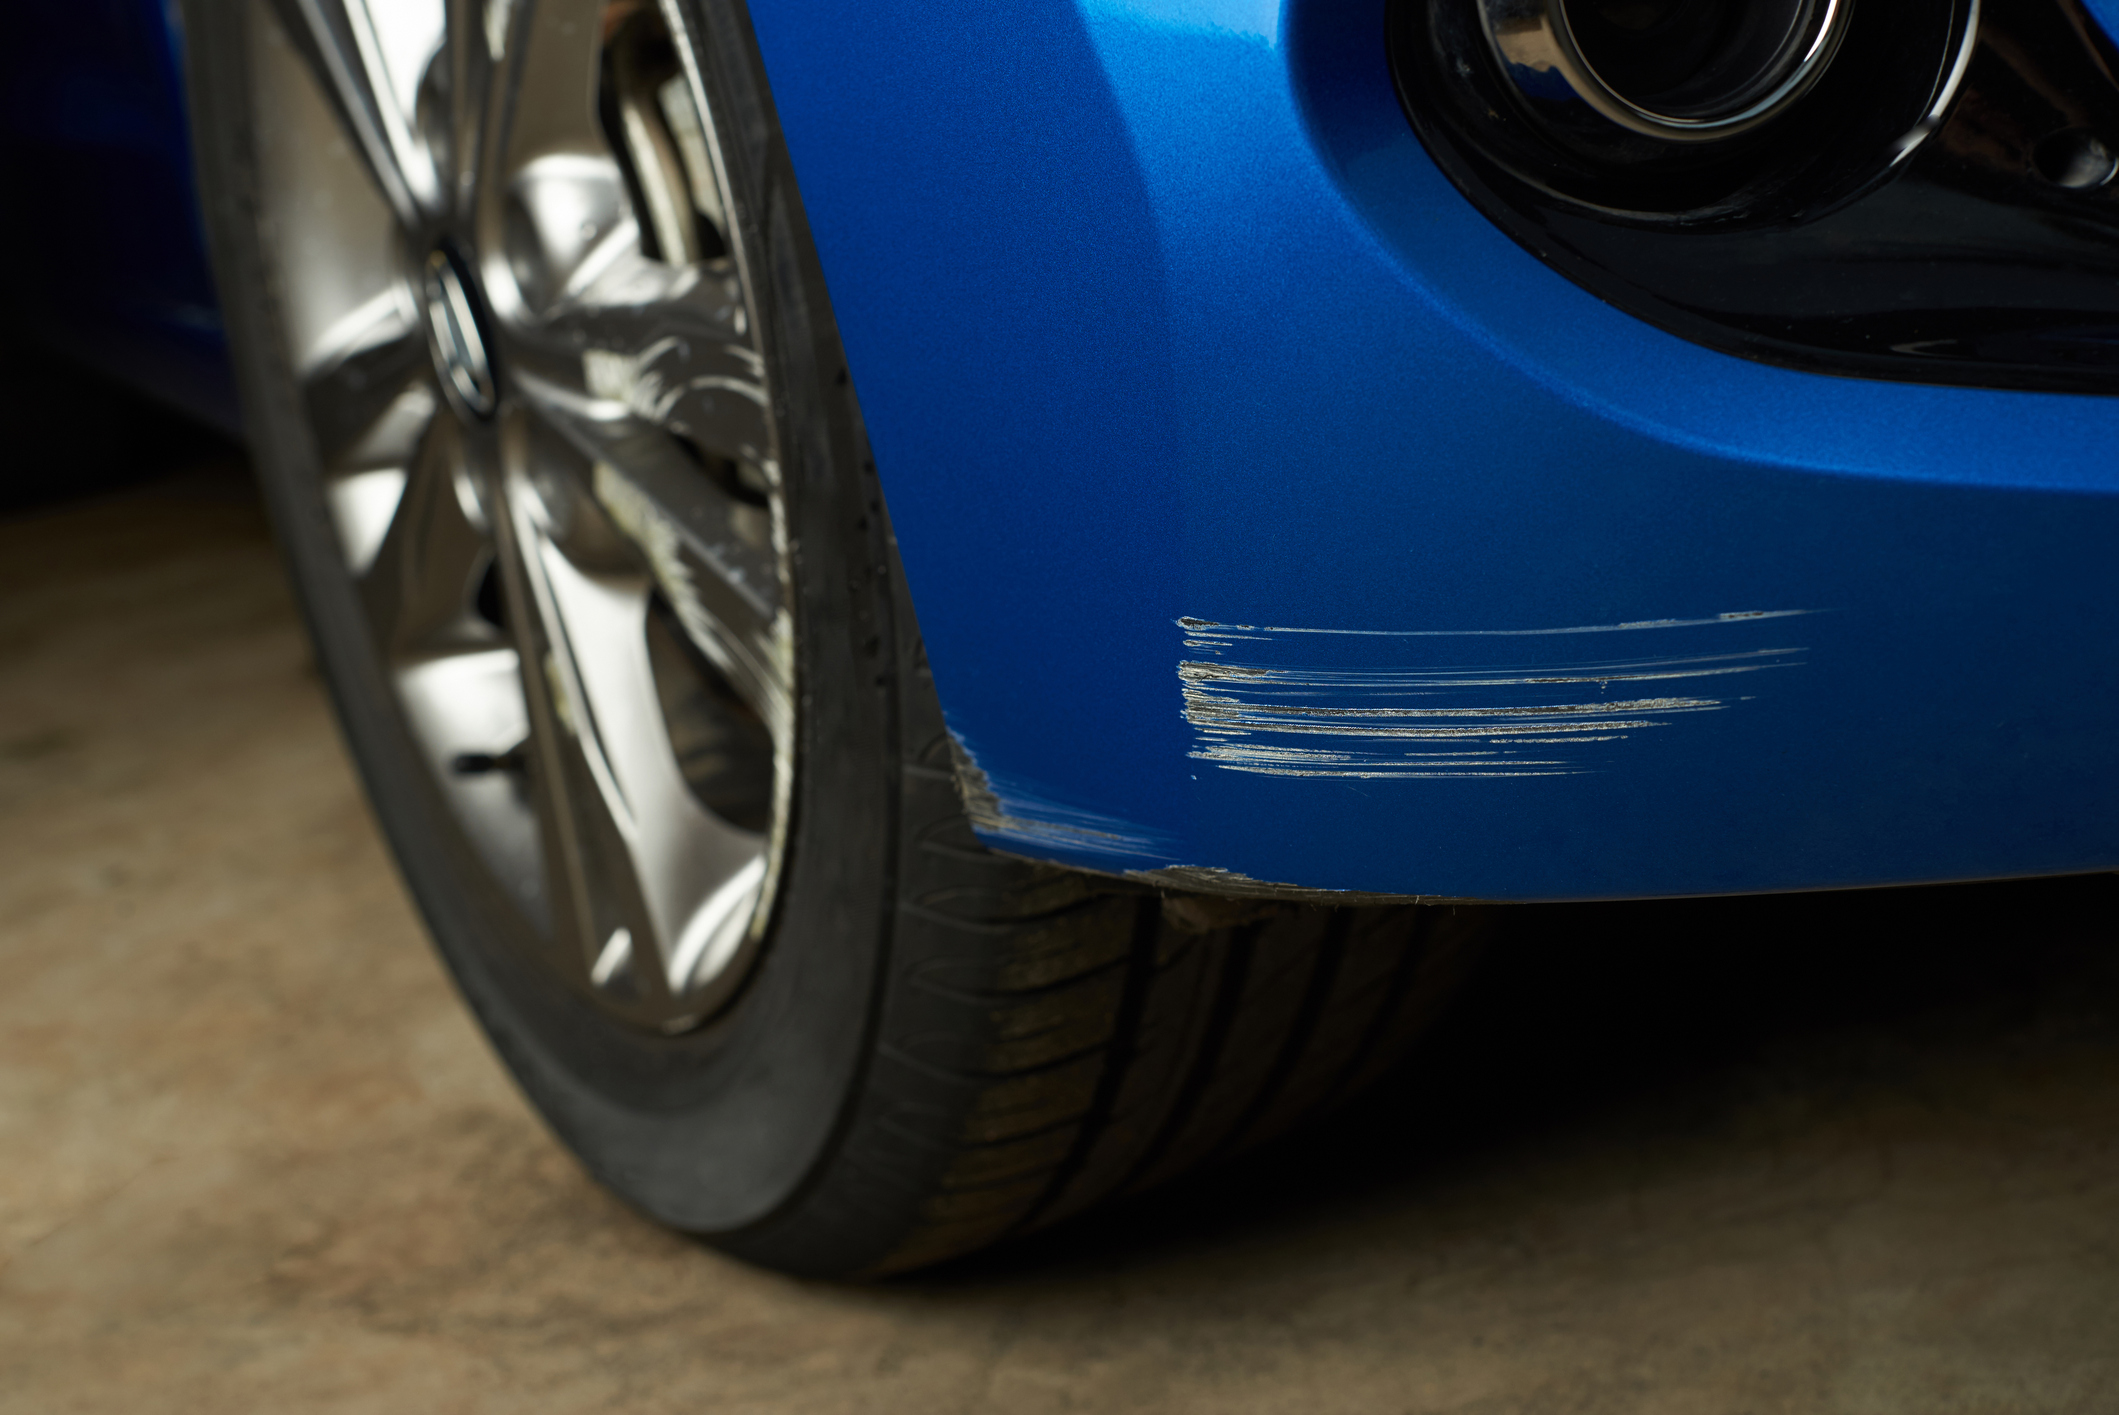

In [9]:

Image('../src/dataset/test/test1.jpg')

### Testing with different models 

In [10]:
y = prepare_image_224('../src/dataset/test/test1.jpg')
preds = vgg16.predict(y)
print(get_predictions(preds, top=5))

1/1 [==============================] - 0s 301ms/step
[[('n02974003', 'car_wheel', 0.31553203), ('n04285008', 'sports_car', 0.3141685), ('n04037443', 'racer', 0.29384384), ('n03459775', 'grille', 0.023042552), ('n03100240', 'convertible', 0.016124016)]]


In [11]:
z = prepare_image_224('../src/dataset/test/test1.jpg')
preds = vgg19.predict(z)
print(get_predictions(preds, top=5))

1/1 [==============================] - 0s 286ms/step
[[('n02974003', 'car_wheel', 0.7188352), ('n04285008', 'sports_car', 0.15282685), ('n04037443', 'racer', 0.041221384), ('n03100240', 'convertible', 0.023260515), ('n03459775', 'grille', 0.017110107)]]


In [12]:
a = prepare_image_224('../src/dataset/test/test1.jpg')
preds = resnet.predict(a)
print(get_predictions(preds))

1/1 [==============================] - 0s 498ms/step
[[('n02974003', 'car_wheel', 0.8316475), ('n04037443', 'racer', 0.0752188), ('n04285008', 'sports_car', 0.023950567), ('n03459775', 'grille', 0.017390195), ('n03208938', 'disk_brake', 0.00666184)]]


In [13]:
b = prepare_image_299('../src/dataset/test/test1.jpg')
preds = inception.predict(b)
print(get_predictions(preds, top=5))

1/1 [==============================] - 1s 621ms/step
[[('n06359193', 'web_site', 1.0), ('n15075141', 'toilet_tissue', 0.0), ('n02319095', 'sea_urchin', 0.0), ('n02391049', 'zebra', 0.0), ('n02389026', 'sorrel', 0.0)]]


In [14]:
c = prepare_image_299('../src/dataset/test/test1.jpg')
preds = xception.predict(c)
print(get_predictions(preds, top=5))

1/1 [==============================] - 0s 414ms/step
[[('n03814906', 'necklace', 0.4020833), ('n03347037', 'fire_screen', 0.23087148), ('n03424325', 'gasmask', 0.09080286), ('n03763968', 'military_uniform', 0.07408344), ('n02999410', 'chain', 0.064177126)]]


##### Result: VGG16 shows best accuracy??

## Using VGG16 model for Phase 1

In [21]:
def get_car_categories():
    d = defaultdict(float)
    img_list = os.listdir('../src/dataset/data1a/training/01-whole')
    for i, img_path in enumerate(img_list):
        img = prepare_image_224('../src/dataset/data1a/training/01-whole/'+img_path)
        out = vgg16.predict(img)
        preds = get_predictions(out,top=5)
        for pred in preds[0]:
            d[pred[0:2]]+=pred[2]
        if(i%50==0):
            print(i,'/',len(img_list),'complete')
    return Counter(d)

In [22]:
categ_count = get_car_categories()

1/1 [==============================] - 0s 107ms/step
0 / 920 complete
1/1 [==============================] - 0s 117ms/step
50 / 920 complete
1/1 [==============================] - 0s 105ms/step
100 / 920 complete
1/1 [==============================] - 0s 106ms/step
150 / 920 complete
1/1 [==============================] - 0s 109ms/step
200 / 920 complete
1/1 [==============================] - 0s 111ms/step
250 / 920 complete
1/1 [==============================] - 0s 108ms/step
300 / 920 complete
1/1 [==============================] - 0s 110ms/step
350 / 920 complete
1/1 [==============================] - 0s 104ms/step
400 / 920 complete
1/1 [==============================] - 0s 108ms/step
450 / 920 complete
1/1 [==============================] - 0s 106ms/step
500 / 920 complete
1/1 [==============================] - 0s 107ms/step
550 / 920 complete
1/1 [==============================] - 0s 105ms/step
600 / 920 complete
1/1 [==============================] - 0s 113ms/step
650 / 920 comp

In [23]:
with open('../src/models/vgg16_cat_list.pk', 'wb') as f:
    pk.dump(categ_count, f, -1)

In [24]:
with open('../src/models/vgg16_cat_list.pk', 'rb') as f:
    categ_count = pk.load(f)

In [25]:
categ_list = [k for k, v in categ_count.most_common()[:50]]

## Imagenet Car Categories

In [27]:
def get_car_categories(categ_list):
    img_list = os.listdir('../src/dataset/data1a/training/01-whole')
    n = 0
    bad_list = []
    for i, img_path in enumerate(img_list):
        img = prepare_image_224('../src/dataset/data1a/training/01-whole/'+img_path)
        out = vgg16.predict(img)
        preds = get_predictions(out, top=5)
        for pred in preds[0]:
            if pred[0:2] in categ_list:
                n+=1
                break
            else:
                pass
            bad_list.append(img_path)
        if i%100 == 0:
            print(i,'/',len(img_list), 'complete')
    bad_list = [k for k, v in Counter(bad_list).items() if v == 5]
    return n, bad_list

In [28]:
num, bad_list = get_car_categories(categ_list)

1/1 [==============================] - 0s 104ms/step
0 / 920 complete
1/1 [==============================] - 0s 104ms/step
100 / 920 complete
1/1 [==============================] - 0s 115ms/step
200 / 920 complete
1/1 [==============================] - 0s 104ms/step
300 / 920 complete
1/1 [==============================] - 0s 105ms/step
400 / 920 complete
1/1 [==============================] - 0s 104ms/step
500 / 920 complete
1/1 [==============================] - 0s 103ms/step
600 / 920 complete
1/1 [==============================] - 0s 104ms/step
700 / 920 complete
1/1 [==============================] - 0s 104ms/step
800 / 920 complete
1/1 [==============================] - 0s 104ms/step
900 / 920 complete
1/1 [==============================] - 0s 110ms/step


# Pipe 1

In [29]:
def pipe1(img_path, categ_list):
    urllib.request.urlretrieve(img_path, 'image.jpg')
    img = prepare_image_224('image.jpg')
    out = vgg16.predict(img)
    preds = get_predictions(out, top=5)
    print("Ensuring entered picture is a car...")
    for pred in preds[0]:
        if pred[0:2] in categ_list:
            print(pred[0:2])
            return "Successful. Proceeding to damage assessment..."
    return "The entered image is a not a car. Please try again. Consider a different angle or lighting."

In [30]:
pipe1("https://www.ebyexteriors.com/wp-content/uploads/2016/04/frame-rot2.jpg", categ_list)

1/1 [==============================] - 0s 111ms/step
Ensuring entered picture is a car...


'The entered image is a not a car. Please try again. Consider a different angle or lighting.'

In [31]:
#pipe1('https://www.autoauctionmall.com/learning-center/contents/uploads/2015/10/damaged-car.jpg', categ_list)

pipe1("https://www.carbodyrepairs.org/wp-content/uploads/2014/08/car-body-repairs33.jpg", categ_list)

1/1 [==============================] - 0s 107ms/step
Ensuring entered picture is a car...
('n02974003', 'car_wheel')


'Successful. Proceeding to damage assessment...'

In [32]:
pipe1('https://tse4.mm.bing.net/th?id=OIP.FaZela57De0uzfVxVY3JJQHaEo&pid=Api&P=0&w=289&h=181', categ_list)

1/1 [==============================] - 0s 105ms/step
Ensuring entered picture is a car...
('n04037443', 'racer')


'Successful. Proceeding to damage assessment...'